In [124]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
path = '/content/drive/MyDrive/Datasets/fashion-mnist_train.csv'

df_train = pd.read_csv(path)

In [127]:
path1='/content/drive/MyDrive/Datasets/fashion-mnist_test.csv'
df_test=pd.read_csv(path1)

In [128]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [129]:
x = df_train.drop(['label'], axis=1)
xt = df_test.drop(['label'], axis=1)
y = df_train['label']
yt = df_test['label']

In [130]:
x.shape

(60000, 784)

In [131]:
y.shape

(60000,)

In [132]:
x=np.array(x)
xt=np.array(xt)
y=np.array(y)
yt=np.array(yt)

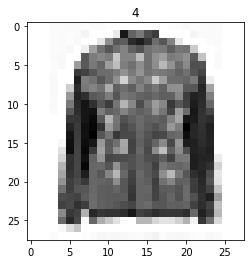

In [133]:
plt.title((y[5]))
plt.imshow(x[5].reshape(28,28), cmap=cm.binary)

In [134]:
x = x/255
xt = xt/255

In [135]:
x = x.T
xt = xt.T
y=y.T
yt=yt.T

In [136]:
x.shape

(784, 60000)

In [137]:
m, n = x.shape

In [138]:
def init_weights():
    w1 = np.random.randn(20, 784)
    b1 = np.zeros((20,1))
    w2 = np.random.randn(10, 20)
    b2 = np.zeros((10,1))
    return w1, b1, w2, b2

def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_der(z):
    sg = sigmoid(z)
    return sg*(1-sg)

def softmax(Z):
  return np.exp(Z) / sum(np.exp(Z))

    
def forward_prop(w1, b1, w2, b2, X):
    Z1 = w1.dot(X) + b1
    A1 = sigmoid(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, w1, w2,b1,b2, X, Y,alpha):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dw2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = w2.T.dot(dZ2) * sigmoid_der(Z1)
    dw1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1    
    w2 = w2 - alpha * dw2  
    b2 = b2 - alpha * db2    
    return w1, b1, w2, b2




In [139]:
def pred_acc(A2, Y):
    predictions=np.argmax(A2, 0)
    return np.sum(predictions == Y) / Y.size

def train_nn(X, Y, alpha, iterations):
    w1, b1, w2, b2 = init_weights()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(w1, b1, w2, b2, X)
        w1, b1, w2, b2= back_prop(Z1, A1, Z2, A2, w1, w2, b1,b2,X, Y,alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            print(pred_acc(A2, Y))
    return w1, b1, w2, b2

In [140]:
def predict(X,Y, w1, b1, w2, b2):
    _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
    return pred_acc(A2,Y)

In [141]:
w1, b1, w2, b2 = train_nn(x,y, 0.1, 1000)

Iteration:  0
0.14018333333333333
Iteration:  100
0.7368
Iteration:  200
0.7781
Iteration:  300
0.7998666666666666
Iteration:  400
0.8143833333333333
Iteration:  500
0.8239833333333333
Iteration:  600
0.8306
Iteration:  700
0.8349166666666666
Iteration:  800
0.8361166666666666
Iteration:  900
0.84245


In [142]:
test_predictions = predict(xt, w1, b1, w2, b2)
print("Accuracy:" , test_predictions)

Accuracy: 0.836
